## Overview The Dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import os


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, validation_curve, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## Dataset Analysis
Exmaple of a picture of each classe.
(paper, glass, plastic)

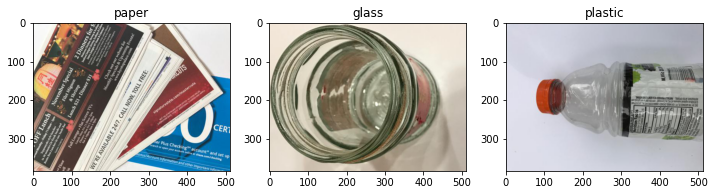

In [2]:
paper = "./archive/garbage_classification/images/paper/paper100.jpg"
glass = "./archive/garbage_classification/images/glass/glass21.jpg"
plastic = "./archive/garbage_classification/images/plastic/plastic21.jpg"

img1 = Image.open(paper)
img2 = Image.open(glass)
img3 = Image.open(plastic)

plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.axis("on")
plt.title("paper")

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.axis("on")
plt.title("glass")

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.axis("on")
plt.title("plastic")
plt.show()

Picture's path for each classe.

In [3]:
glass= "./archive/garbage_classification/images/glass/"
paper= "./archive/garbage_classification/images/paper/"
plastic=  "./archive/garbage_classification/images/plastic/"

dict = {}
dict[0] = 'glass'
dict[1] = 'plastic'
dict[2] = 'paper'

## Data Preparation

In [4]:
minh, minv = 100000,100000

for p in range(0,328):
    s = ''
    if p<10:
        s += '00'
    elif p < 100:
        s += '0'
    pic = Image.open(metal+s+str(p)+".jpg")
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
for u in range(0,401):
    s = ''
    if u<10:
        s += '00'
    elif u < 100:
        s += '0'
    pic = Image.open(glass+s+str(u)+".jpg")
    if pic.size[0] < minh:
        minh = pic.size[0]
    if pic.size[1] < minv:
        minv = pic.size[1]
print(minh)
print(minv)

NameError: name 'metal' is not defined

The dataset is not balanced. Using the data as it is is will probably show wrong results and we may suffer of Overfitting. This means that we need to do some pre processing in order to be able to make conclusions.

Glass: 31.761 % 
Paper: 37.676 % 
Plastic: 30.563 % 


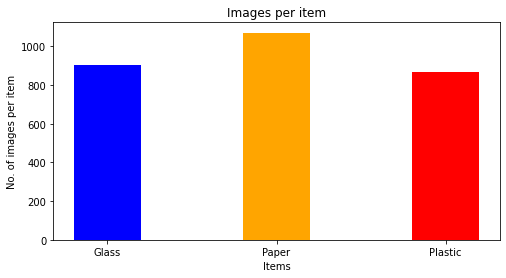

In [5]:
glass_items=902
paper_items=1070
plastic_items=868

print('Glass:', round(glass_items/(glass_items+paper_items+plastic_items) * 100,3), '% ')
print('Paper:', round(paper_items/(glass_items+paper_items+plastic_items) * 100,3),'% ')
print('Plastic:', round(plastic_items/(glass_items+paper_items+plastic_items) * 100,3),'% ')

data = {'Glass': glass_items, 'Paper': paper_items, 'Plastic': plastic_items}
items = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 4))

plt.bar(items[0], values[0], color ='blue',width = 0.4)
plt.bar(items[1], values[1], color ='orange',width = 0.4)
plt.bar(items[2], values[2], color ='red',width = 0.4)

plt.xlabel("Items")
plt.ylabel("No. of images per item")
plt.title("Images per item")
plt.show()

In order of the results above we decided to balance the dataset and only use the same number of images of each classe.

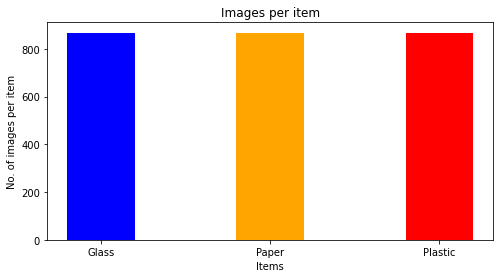

In [6]:
num_images=868 # 868 beacause it is the lowest number from the three classes

data = {'Glass': num_images, 'Paper': num_images, 'Plastic': num_images}
items = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 4))

plt.bar(items[0], values[0], color ='blue',width = 0.4)
plt.bar(items[1], values[1], color ='orange',width = 0.4)
plt.bar(items[2], values[2], color ='red',width = 0.4)

plt.xlabel("Items")
plt.ylabel("No. of images per item")
plt.title("Images per item")
plt.show()

In order to make more easy and lower the number of features we decided to resize each image to 128*128 pixels, beacuse initially the lowesr size was 512*384 which leads to a higher number of features.

In [7]:
img_size = 128
train_images = []

for p in range(1,num_images+1):
    image = Image.open(glass+"glass"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

for p in range(1,num_images+1):
    image = Image.open(plastic+"plastic"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

for p in range(1,num_images+1):
    image = Image.open(paper+"paper"+str(p)+".jpg")
    image = image.resize((img_size, img_size))
    #image = image.convert(mode="L")
    train_images.append(image)

## Data Normalization

In [8]:
X = np.empty((num_images*3, img_size* img_size*3))
index = 0
for pl in train_images:
    # Normalize pixel values
    pixels = asarray(pl)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    X[index] = pixels.reshape(img_size * img_size * 3)
    index += 1
g = np.zeros(num_images)
m = np.ones(num_images)
p = np.empty(num_images)
p.fill(2)
y = np.concatenate((g, m, p), axis=0).reshape(X.shape[0], 1)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2604, 49152)
y shape:  (2604, 1)


In [9]:

y = y.ravel()

# extract train sub-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

st_x = StandardScaler()    
X_train = st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test) 
  
# X_train.mean(axis=0)
# X_train.std(axis=0)
# extract cross validation and test sub-sets
#X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.4, random_state=42)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

# print(f"X val flatten: {X_val.shape}")
# print(f"y val: {y_val.shape}")

# print(f"X test flatten: {X_test.shape}")
# print(f"y test: {y_test.shape}")

X train: (2083, 49152)
y train: (2083,)
X test: (521, 49152)
y test: (521,)


In [31]:
def model_train(model, name, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    test_data_accuracy = accuracy_score(y_pred, y_test)

    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print()
    print("- MODEL ANALYSIS")
    print("Accuracy (train) for %s: %0.5f%% " % (name, test_data_accuracy * 100))
    print('Precision Score for %s: %0.5f%%' %(name, precision*100))
    print('Recall Score for %s: %0.5f%%' %(name, recall*100))
    print('F1 Score for %s: %0.5f%%' %(name, f1*100))
    
    print()
    
    print("-------- Confusion Matrix -------")
    index = ('glass', 'plastic', 'paper')
    cm = confusion_matrix(y_test, y_pred)

    dataframe = pd.DataFrame(cm, index=index, columns=index)

    print(dataframe)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print()
    print("------- Classification Report -------")
    print( classification_report(y_test, model.predict(X_test)) )

def kfold(model, k, X_train, y_train):
    print("- K-FOLD CROSS-VALIDATION")
    
    kf = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, y_train, scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

def hyperparameters(model, params, X, y):
    print("- FIND HYPERPARAMETERS FOR A MODEL")

    model = GridSearchCV(model, params, scoring="accuracy")
    model.fit(X, y)
    print(" Best Params:", model.best_params_)

    return model.best_params_

## Logistic Regression

- K-FOLD CROSS-VALIDATION

- MODEL ANALYSIS
Accuracy (train) for Logistic Regression: 85.22073% 
Precision Score for Logistic Regression: 85.76217%
Recall Score for Logistic Regression: 85.44027%
F1 Score for Logistic Regression: 85.22226%

-------- Confusion Matrix -------
         glass  plastic  paper
glass      150       20     11
plastic      9      154      1
paper       15       21    140


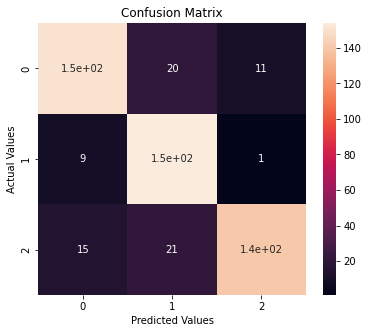


------- Classification Report -------
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       181
         1.0       0.79      0.94      0.86       164
         2.0       0.92      0.80      0.85       176

    accuracy                           0.85       521
   macro avg       0.86      0.85      0.85       521
weighted avg       0.86      0.85      0.85       521



In [33]:
# Using multinomial logistic regression
model = LogisticRegression(max_iter=2000)
model_train(model,'Logistic Regression', X_train, y_train, X_test, y_test)

# Hypertuned Params
model_params = [{'multi_class': ['multinomial', 'ovr'], 'max_iter': [800, 2000, 10000]}]
best_model_params = hyperparameters(model, model_params , X_train, y_train)

model.set_params(**best_model_params)
model_train(model, 'Logistic Regression', X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kfmodel = kfold(model, 5, X_train, y_train)
model_train(kfmodel, 'Logistic Regression', X_train, y_train, X_test, y_test)

## Neural Network


- MODEL ANALYSIS
Accuracy (train) for NN: 85.22073% 
Precision Score for NN: 85.36922%
Recall Score for NN: 85.19394%
F1 Score for NN: 85.19606%

-------- Confusion Matrix -------
         glass  plastic  paper
glass      160       12      9
plastic     16      140      8
paper       16       16    144


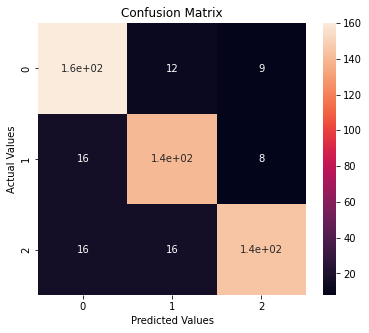


------- Classification Report -------
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       181
         1.0       0.83      0.85      0.84       164
         2.0       0.89      0.82      0.85       176

    accuracy                           0.85       521
   macro avg       0.85      0.85      0.85       521
weighted avg       0.85      0.85      0.85       521

- FIND HYPERPARAMETERS FOR A MODEL


In [34]:
model = MLPClassifier(max_iter=20000)

model_train(model,'NN', X_train, y_train, X_test, y_test)

mlp_parameters = {
    'hidden_layer_sizes': [(2,),(4,),(6,),(8,)],
    'activation': ['logistic', 'tanh'],
    'solver': [ 'adam'],
    'max_iter': [10000, 20000],
}

hyper_mlp_parameters = hyperparameters(model, mlp_parameters , X_train, y_train)
model.set_params(**hyper_mlp_parameters)
model_train(model,'NN', X_train, y_train, X_test, y_test)

kfmodel = kfold(model, 5, X_train, y_train)
model_train(kfmodel,'NN', X_train, y_train, X_test, y_test)


## Random Forest


---- Model Analysis ----
Accuracy (train) for RFC: 94.4% 

---- Confusion Matrix ----
         glass  plastic  paper
glass      171        7      3
plastic      7      156      1
paper        7        4    165


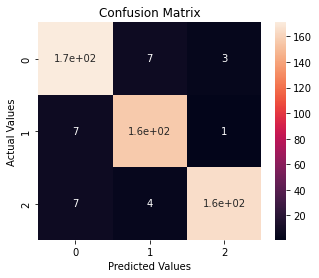


---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       181
         1.0       0.93      0.95      0.94       164
         2.0       0.98      0.94      0.96       176

    accuracy                           0.94       521
   macro avg       0.94      0.94      0.94       521
weighted avg       0.94      0.94      0.94       521



In [11]:
model = RandomForestClassifier()

model_train(model, 'RFC', X_train, y_train, X_test, y_test)

rfc_parameters = { 
    'max_features': ['auto', 'sqrt'],
    'criterion' :['gini', 'entropy'],
}

hyper_rfc_parameters = hyperparameters(model, rfc_parameters , X_train, y_train)
model.set_params(**hyper_rfc_parameters)
model_train(model,'RFC', X_train, y_train, X_test, y_test)

kfmodel = kfold(model, 5, X_train, y_train)
model_train(kfmodel,'RFC', X_train, y_train, X_test, y_test)

## Decision Tree


---- Model Analysis ----
Accuracy (train) for DecisionTree: 89.1% 

---- Confusion Matrix ----
         glass  plastic  paper
glass      158        8     15
plastic      9      152      3
paper       14        8    154


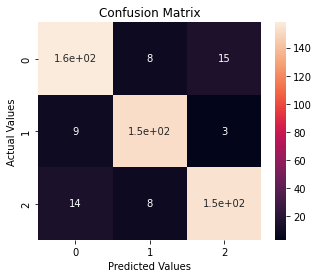


---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       181
         1.0       0.90      0.93      0.92       164
         2.0       0.90      0.88      0.89       176

    accuracy                           0.89       521
   macro avg       0.89      0.89      0.89       521
weighted avg       0.89      0.89      0.89       521



In [12]:
model = DecisionTreeClassifier()

model_train(model, 'DecisionTree', X_train, y_train, X_test, y_test)

## SVM


---- Model Analysis ----
Accuracy (train) for SVM: 85.6% 

---- Confusion Matrix ----
         glass  plastic  paper
glass      143       26     12
plastic     13      145      6
paper       13        5    158


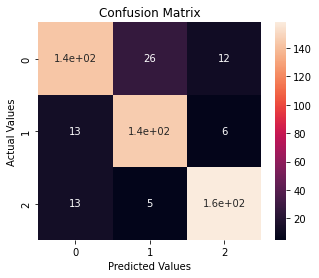


---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       181
         1.0       0.82      0.88      0.85       164
         2.0       0.90      0.90      0.90       176

    accuracy                           0.86       521
   macro avg       0.86      0.86      0.86       521
weighted avg       0.86      0.86      0.86       521



In [14]:
model = SVC()

model_train(model, 'SVM', X_train, y_train, X_test, y_test)

svm_parameters = [{'C': [0.01, 0.1, 1, 10, 50, 100, 1000], 
              'gamma': [0.001, 0.01, 0.03, 0.1, 0.3, 1],
              'kernel': ['rbf']}]
best_svm_params = hyperparameters(model, svm_parameters , X_train, y_train)

model.set_params(**best_svm_params)
model_train(model,'SVM', X_train, y_train, X_test, y_test)

kfmodel = kfold(model, 5, X_train, y_train)
model_train(kfmodel, 'SVM', X_train, y_train, X_test, y_test)